# Lead Scoring Case Study
The objective of this case study is to create a logistic regression model to predict labels for data and make recommendations based on it

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data = pd.read_csv('Leads.csv')

## Exploratory Data Analysis
Lets start off by taking a look at the dataset

In [2]:
data.shape

(9240, 37)

There are 9240 records with 37 features

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

From the above, we can see that majority of the columns are `object` columns. This could indicate that some columns are wrongly typed or majority of the data is categorical. From the above, it is also evident that some columns have Null values. Hence, we will have to deal with the missing values accordingly. 

In [4]:
data

Prospect ID  Lead Number              Lead Origin       Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit                 Last Activity               Country                     Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                   Tags       Lead Quality Update me on Supply Chain Content Get updates on DM Content                 Lead Profile                         City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview     Last Notable Activity
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API        Olark Chat           No          No          0          0.0                            0                  0.00       Page Visited on Website                   NaN                             Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No            Interested in other courses   Low in Relevance                                No                        No                       Select                       Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No                  Modified
1     2a272436-5132-4136-86fa-dcc88c88f482       660728                      API    Organic Search           No          No          0          5.0                          674                  2.50                  Email Opened                 India                             Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                                Ringing                NaN                                No                        No                       Select                       Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Email Opened
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission    Direct Traffic           No          No          1          2.0                         1532                  2.00                  Email Opened                 India            Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No    Will revert after reading the email           Might be                                No                        No               Potential Lead                       Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes              Email Opened
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission    Direct Traffic           No          No          0          1.0                          305                  1.00                   Unreachable                 India              Med

### Missing Value Analysis

Let us look at the percentage of missing values in each `column`

In [5]:
(data.isnull().sum()/len(data.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

For any data analysis, **20-25%** of missing values per column is tolerable. It is clear from the above values that columns like :
- `Lead Profile`, 
- `Country`, 
- `What is your current occupation`, 
- `What matters most to you in choosing a course`, 
- `Tags`, 
- `Lead Quality`, 
- `Lead Profile`, 
- `Asymmetrique Activity Index`, 
- `Asymmetrique Profile Index`, 
- `Asymmetrique Activity Score` 
- `Asymmetrique Profile Score` 

have a large number of missing values. These columns have to be dropped.

In [6]:
data_dropped = data.drop(['Lead Profile','Country','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [7]:
(data_dropped.isnull().sum()/len(data_dropped.index))*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              15.562771
How did you hear about X Education          23.885281
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

Some columns still have missing values in them. Let us drop those records which have more than 5 missing values in each row

In [8]:
data_dropped.dropna(thresh=5,inplace=True,axis=0)

In [9]:
(data_dropped.isnull().sum()/len(data_dropped.index))*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              15.562771
How did you hear about X Education          23.885281
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

In [10]:
data_dropped['Lead Source'] = ~pd.isnull(data_dropped['Lead Source'])
data_dropped['TotalVisits'] = ~pd.isnull(data_dropped['TotalVisits'])
data_dropped['Page Views Per Visit'] = ~pd.isnull(data_dropped['Page Views Per Visit'])
data_dropped['Last Activity'] = ~pd.isnull(data_dropped['Last Activity'])

Let us leave the rest of the missing values as it is and proceed with our analysis

Furthermore, let us rename some of the columns to make it easier to access.

In [11]:
rename_columns = {'Total Time Spent on Website':'WebsiteTime','How did you hear about X Education':'HowHear','X Education Forums':'Forums','Receive More Updates About Our Courses':'UpdatesCourses','Update me on Supply Chain Content':'UpdateSupply','Get updates on DM Content':'DMUpdates','I agree to pay the amount through cheque':'ChequePay','A free copy of Mastering The Interview':'FreeCopy','Last Notable Activity':'LastActivity'}
data_dropped_changed = data_dropped.rename(columns=rename_columns)

### Incorrect Value analysis
Let us take a closer look at the different values in the categories and see there are any anomalies. Let us do a column-wise category analysis, before dropping the missing values

In [12]:
data_dropped_changed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 27 columns):
Prospect ID                9240 non-null object
Lead Number                9240 non-null int64
Lead Origin                9240 non-null object
Lead Source                9240 non-null bool
Do Not Email               9240 non-null object
Do Not Call                9240 non-null object
Converted                  9240 non-null int64
TotalVisits                9240 non-null bool
WebsiteTime                9240 non-null int64
Page Views Per Visit       9240 non-null bool
Last Activity              9240 non-null bool
Specialization             7802 non-null object
HowHear                    7033 non-null object
Search                     9240 non-null object
Magazine                   9240 non-null object
Newspaper Article          9240 non-null object
Forums                     9240 non-null object
Newspaper                  9240 non-null object
Digital Advertisement      9240 non-null

In [13]:
data_categorical = data_dropped_changed.select_dtypes(include=['object'])
for column in list(data_categorical.columns):
    if len(data_dropped_changed[column].astype('category').value_counts())==1:
        print('----------- Column Being Removed since only one type of value-------- ', column)
        data_dropped_changed.drop(column,inplace=True,axis=1)
    elif len(data_dropped_changed[column].astype('category').value_counts())==2:
        if data_dropped_changed[column].astype('category').value_counts()[0]>(0.80* len(data_dropped_changed.index)):
            print('----------- Column Being Removed since less percentage of distribution-------- ', column)
            data_dropped_changed.drop(column,inplace=True,axis=1)

('----------- Column Being Removed since less percentage of distribution-------- ', 'Do Not Email')
('----------- Column Being Removed since less percentage of distribution-------- ', 'Do Not Call')
('----------- Column Being Removed since less percentage of distribution-------- ', 'Search')
('----------- Column Being Removed since only one type of value-------- ', 'Magazine')
('----------- Column Being Removed since less percentage of distribution-------- ', 'Newspaper Article')
('----------- Column Being Removed since less percentage of distribution-------- ', 'Forums')
('----------- Column Being Removed since less percentage of distribution-------- ', 'Newspaper')
('----------- Column Being Removed since less percentage of distribution-------- ', 'Digital Advertisement')
('----------- Column Being Removed since less percentage of distribution-------- ', 'Through Recommendations')
('----------- Column Being Removed since only one type of value-------- ', 'UpdatesCourses')
('---------

In [14]:
data_dropped_changed['City'].astype('category').value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

`Quick Add Form`, `Lead Import` and `Quick Add Form` have very few values. Let us put them into one category

In [15]:
other_forms = ['Lead Add Form','Lead Import','Quick Add Form']
data_dropped_changed['Lead Origin'] = data_dropped_changed['Lead Origin'].apply(lambda x: 'Other Forms' if x in other_forms else x )

Since all values are `True` in Lead Source, we can drop this column as it adds no value

In [16]:
data_dropped_changed.drop(['Lead Source'],inplace=True,axis=1)

`Last Activity` only has true values, lets drop this columns as well

In [17]:
data_dropped_changed.drop(['Last Activity'],inplace=True,axis=1)

In [18]:
(data_dropped_changed.isnull().sum()/len(data_dropped_changed.index))*100

Prospect ID              0.000000
Lead Number              0.000000
Lead Origin              0.000000
Converted                0.000000
TotalVisits              0.000000
WebsiteTime              0.000000
Page Views Per Visit     0.000000
Specialization          15.562771
HowHear                 23.885281
City                    15.367965
FreeCopy                 0.000000
LastActivity             0.000000
dtype: float64

Columns with 'Select' type are basically Unknown values, since they havent been entered. Let us change the values accordingly

In [19]:
data_dropped_changed['Specialization'] = data_dropped_changed['Specialization'].apply(lambda x: 'Unknown' if x=='Select' else x)
data_dropped_changed['City'] = data_dropped_changed['City'].apply(lambda x: 'Unknown' if x=='Select' else x)
data_dropped_changed['HowHear'] = data_dropped_changed['HowHear'].apply(lambda x: 'Unknown' if x=='Select' else x)

In [20]:
(data_dropped_changed.isnull().sum()/len(data_dropped_changed.index))*100

Prospect ID              0.000000
Lead Number              0.000000
Lead Origin              0.000000
Converted                0.000000
TotalVisits              0.000000
WebsiteTime              0.000000
Page Views Per Visit     0.000000
Specialization          15.562771
HowHear                 23.885281
City                    15.367965
FreeCopy                 0.000000
LastActivity             0.000000
dtype: float64

## Data Preparation

Now that we have analysed the missing values and categorical values, let us prepare the data to make sure it fits into the logistic regression model. Let us also impute the remaining Missing values by using Fill Na

In [21]:
data_dropped_changed.fillna(method='ffill',inplace=True,axis=0)

In [22]:
(data_dropped_changed.isnull().sum()/len(data_dropped_changed.index))*100

Prospect ID             0.0
Lead Number             0.0
Lead Origin             0.0
Converted               0.0
TotalVisits             0.0
WebsiteTime             0.0
Page Views Per Visit    0.0
Specialization          0.0
HowHear                 0.0
City                    0.0
FreeCopy                0.0
LastActivity            0.0
dtype: float64

In [23]:
#Popping Lead Number and Prospect ID since they are reference for the predicted Lead Scores
prospect_ids = data_dropped_changed.pop('Prospect ID')
lead_nums = data_dropped_changed.pop('Lead Number')

Let us convert the Categorical Columns into Dummy columns by using One Hot encoding

In [24]:
data_numeric_final = list(data_dropped_changed.select_dtypes(include=['float64','int64']).columns)
data_categorical_final = list(data_dropped_changed.select_dtypes(include=['object','bool']).columns)

In [25]:
data_numeric_final.remove('Converted') #We remove this since its the target column

### Dummy Variable Creation

In [26]:
# Drop categorical variable columns
data_numeric = pd.get_dummies(data_dropped_changed,columns = data_categorical_final,drop_first=True)

In [27]:
data_numeric

Converted  WebsiteTime  Lead Origin_Landing Page Submission  Lead Origin_Other Forms  TotalVisits_True  Page Views Per Visit_True  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Operations Management  Specialization_Retail Management  Specialization_Rural and Agribusiness  Specialization_Services Excellence  Specialization_Supply Chain Management  Specialization_Travel and Tourism  Specialization_Unknown  HowHear_Email  HowHear_Multiple Sources  HowHear_Online Search  HowHear_Other  HowHear_SMS  HowHear_Social Media  HowHear_Student of SomeSchool  HowHear_Unknown  HowHear_Word Of Mouth  City_Other Cities  \
0             0            0                                    0                        0                 1                          1                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                                 0                                      0                                   0                                       0                                  0                       1              0                         0                      0              0            0                     0                              0                1                      0                  0   
1             0          674                                    0                        0                 1                          1                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                                 0                                      0                                   0                                       0                                  0                       1              0                         0                      0              0            0                     0                              0                1                      0                  0   
2             1         1532                                    1                        0                 1                          1                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0                                 0                                      0                                   0                                       0                                  0                       0              0                         0                      0              0            0                     0                              0                1                      0                  0   
3             0          305                  

## Model Preparation
Lets start off by creating the test and train split. Before we split the data into a train and test split, lets remove the target variable

### Test-Train Split

In [28]:
# Split the datafram into train and test sets
from sklearn.cross_validation import train_test_split
y = data_numeric.pop('Converted')
X_train, X_test, y_train, y_test= train_test_split(data_numeric,y, train_size=0.7, test_size=0.3, random_state=123)

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Scaling 

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [29]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
data_numeric[data_numeric_final] = scaler.fit_transform(data_numeric[data_numeric_final])

In [30]:
#Checking Churn Rate
churn = (sum(y.values)/len(y.index))*100

In [31]:
#The churn rate is not very low and hence we can proceed with it
(sum(y.values)*1.0)/(len(y.index))

0.38538961038961039

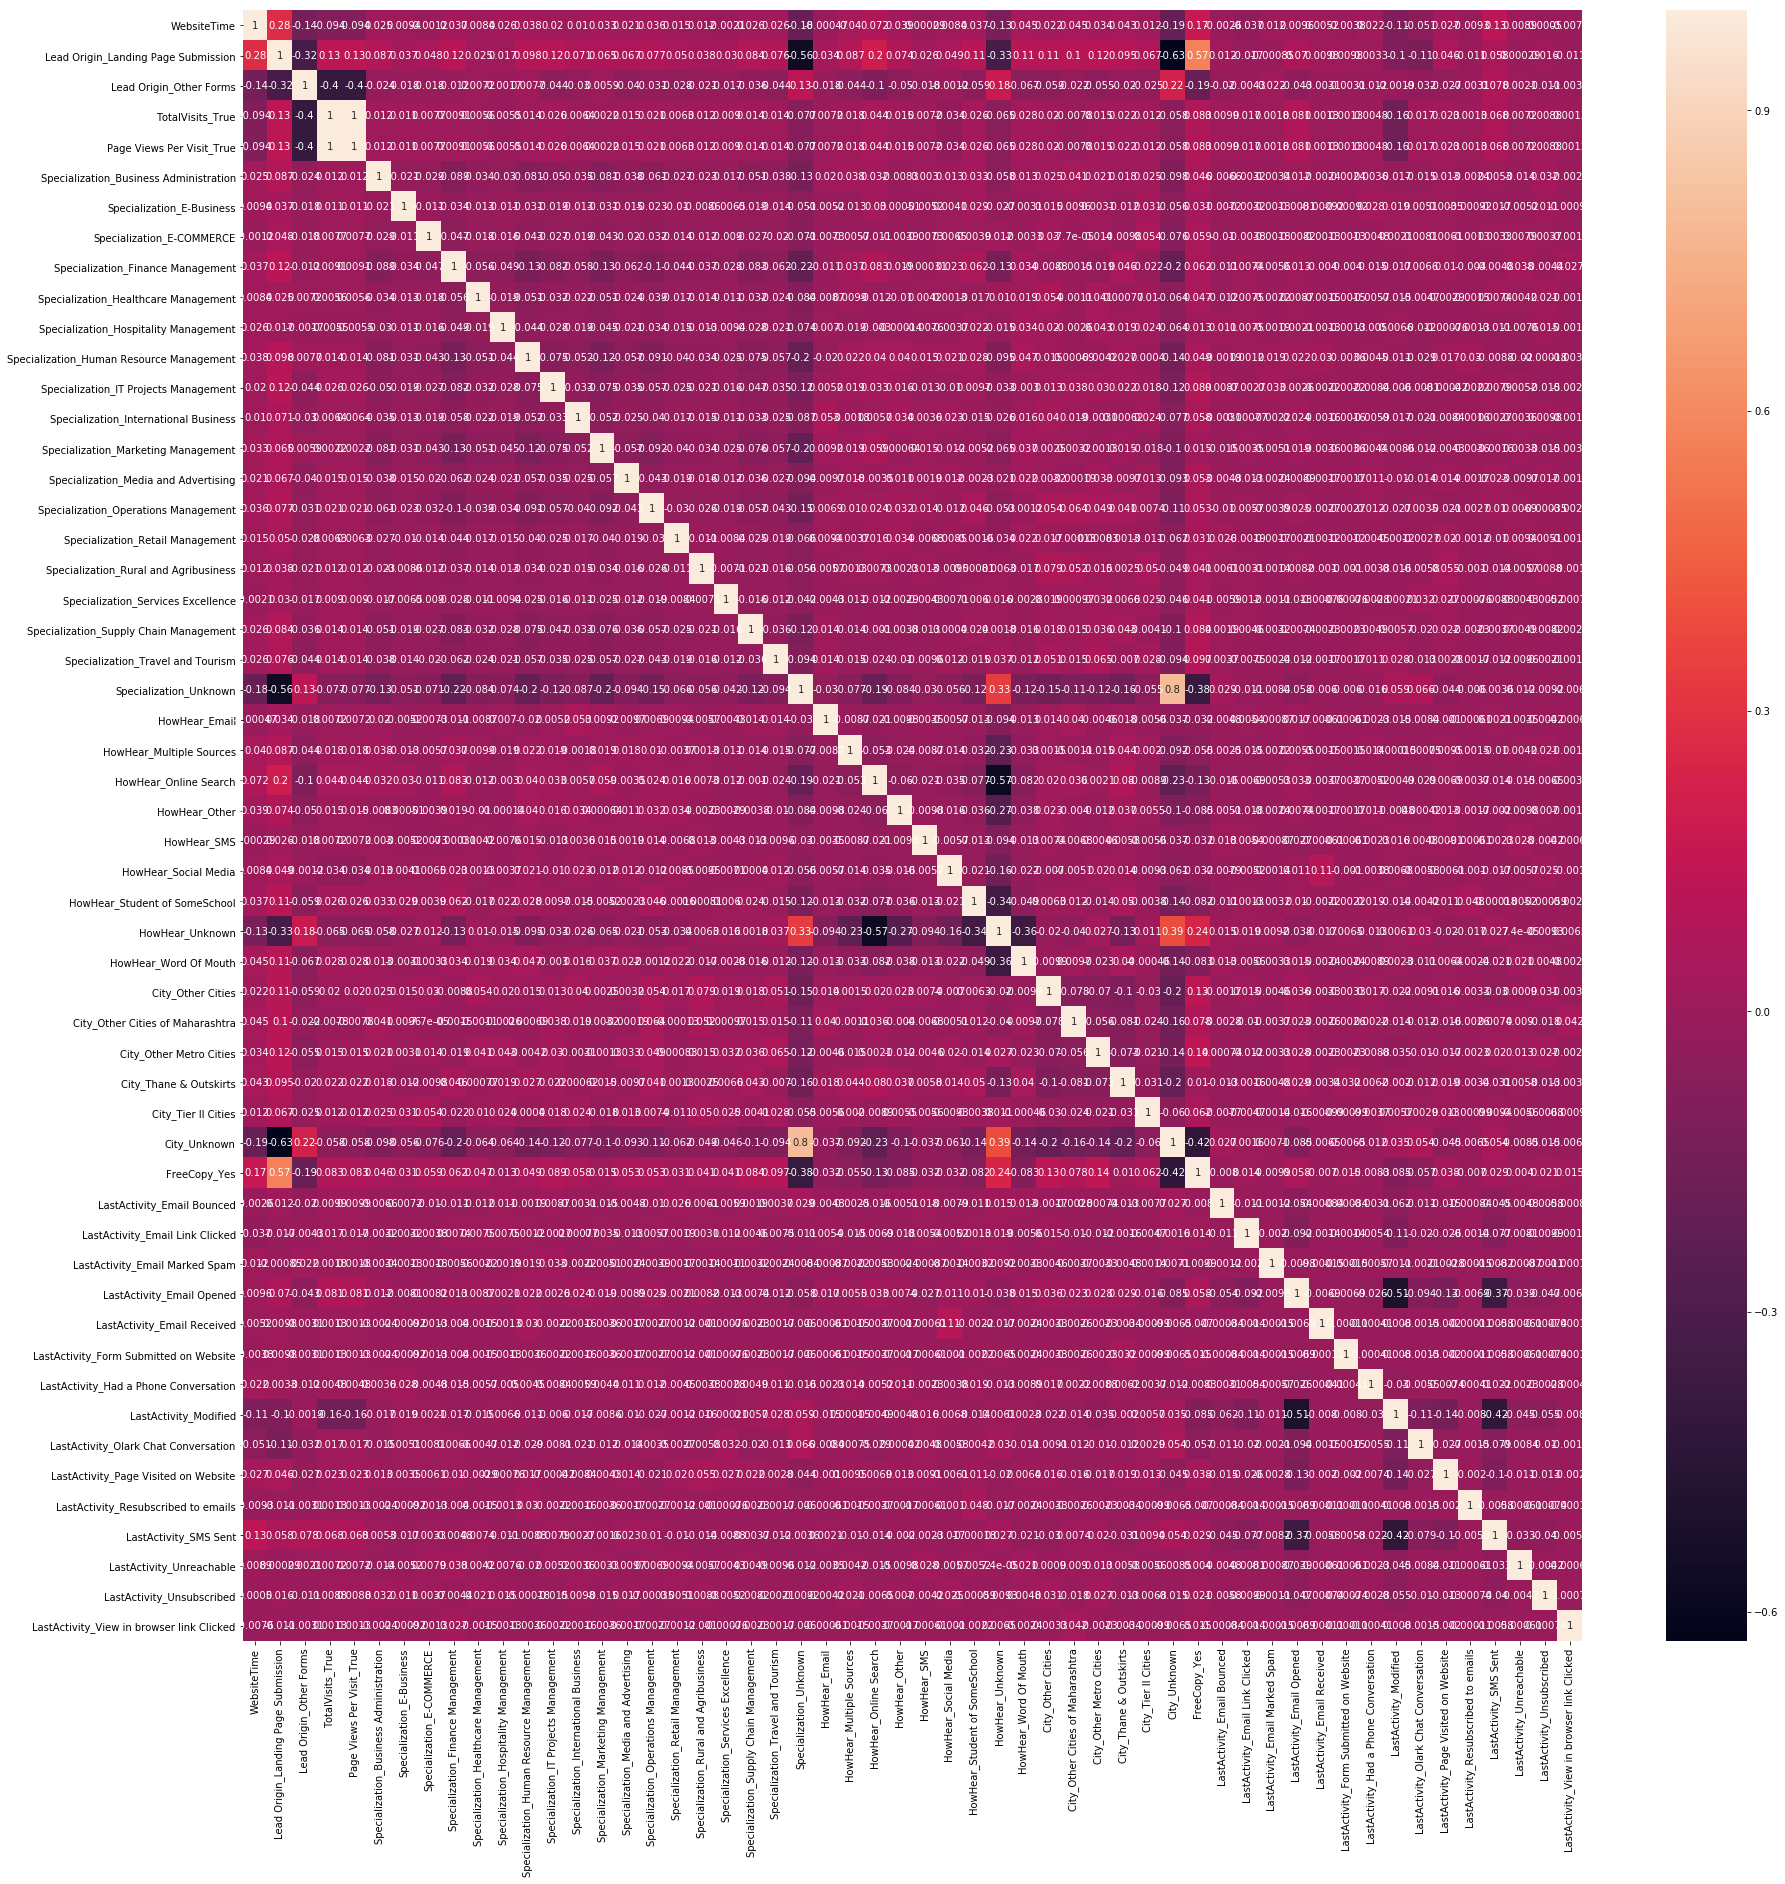

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.heatmap(data_numeric.corr(), annot=True)

Lets discard higly correlated values

In [33]:
X_train.drop(['City_Unknown','Specialization_Unknown'],inplace=True,axis=1)
X_test.drop(['City_Unknown','Specialization_Unknown'],inplace=True,axis=1)

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Model Evaluation and Optimization
Let us use relevant metrics to make changes to optimize the model creation

In [34]:
import statsmodels.api as sm

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [35]:
y_train

5498    0
864     1
9177    0
6612    0
8705    0
3162    1
3225    1
8557    0
7208    1
4395    1
8017    0
4372    0
2714    1
5652    0
7905    0
897     0
8530    0
7906    0
43      0
9203    1
5582    0
4037    1
1185    0
9224    0
8964    0
6239    0
3575    1
6732    0
2526    1
7696    1
7383    0
5457    0
5502    1
5627    0
916     0
6820    0
3768    0
8872    0
8888    1
2700    0
997     1
3754    0
9081    0
2435    0
4044    1
8633    0
3417    1
2686    1
363     0
6390    0
3738    0
4029    1
3568    0
5733    0
8645    1
5240    1
4415    1
9020    1
4097    0
3237    1
6717    0
4324    0
7117    1
8949    1
6936    0
7455    1
6349    0
7630    0
7664    1
6767    1
6509    1
5503    0
990     0
7893    1
4732    1
8165    0
3021    1
5104    0
1336    0
1674    0
6082    0
5886    0
7473    0
3629    0
6360    1
8870    0
4757    1
693     1
6461    1
2646    0
2823    0
6023    0
3698    0
5683    1
1635    0
9189    0
1355    1
1863    0
3319    1
1520    0


In [36]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6419
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2998.0
Date:                Mon, 07 Oct 2019   Deviance:                       5996.0
Time:                        22:16:06   Pearson chi2:                 6.64e+03
No. Iterations:                    20                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.3676   3616.072     -0.000      1.000   -7088.738    7086.003
WebsiteTime                                   0.0019    6.4e-05     29.840      0.000       0.002       0.002
Lead Origin_Landing Page Submission          -0.4977      0.102     -4.858      0.000      -0.698      -0.297
Lead Origin_Other Forms                       3.5711      0.181     19.700      0.000       3.216       3.926
TotalVisits_True                              0.8303      0.160      5.194      0.000       0.517       1.144
Page Views Per Visit_True                     0.8303      0.160      5.194      0.000       0.517       1.144
Specialization_Business Administration        0.4105      0.164      2.497      0.013       0.088       0.733
Specialization_E-Business                    -0.1182      0.415     -0.285      0.776      -0.932       0.695
Specialization_E-COMMERCE                     0.2498      0.262      0.952      0.341      -0.264       0.764
Specialization_Finance Management             0.2111      0.124      1.706      0.088      -0.031       0.453
Specialization_Healthcare Management          0.3982      0.229      1.741      0.082      -0.050       0.846
Specialization_Hospitality Management         0.0081      0.266      0.030      0.976      -0.514       0.530
Specialization_Human Resource Management      0.2784      0.124      2.241      0.025       0.035       0.522
Specialization_IT Projects Management         0.0579      0.180      0.321      0.748      -0.295       0.411
Specialization_International Business         0.2629      0.231      1.135      0.256      -0.191       0.717
Specialization_Marketing Management           0.3738      0.122      3.063      0.002       0.135       0.613
Specialization_Media and Advertising          0.2381      0.209      1.139      0.255      -0.172       0.648
Specialization_Operations Management          0.3543      0.151      2.345      0.019       0.058       0.651
Specialization_Retail Management              0.0878      0.294      0.298      0.765      -0.489       0.665
Specialization_Rural and Agribusiness         0.5189      0.337      1.539      0.124      -0.142       1.180
Specialization_Services Excellence            0.2706      0.460      0.588      0.556      -0.631       1.172
Specialization_Supply Chain Management        0.1060      0.171      0.620      0.536      -0.229       0.441
Specialization_Travel and Tourism             0.1272      0.219      0.581      0.561      -0.302       0.556
HowHear_Email                                 0.7154      0.588      1.216      0.224      -0.437       1.868
HowHear_Multiple Sources                     -0.3403      0.386     -0.883      0.377      -1.096       0.415
HowHear_Online Search                         0.0618      0.329      0.188      0.

### Feature selection using RFE

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)

In [38]:
final_model_train = X_train[X_train.columns[rfe.support_]]

In [39]:
logm2 = sm.GLM(y_train, (sm.add_constant(final_model_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3550.5
Date:                Mon, 07 Oct 2019   Deviance:                       7101.0
Time:                        22:16:08   Pearson chi2:                 6.62e+03
No. Iterations:                    19                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6591      0.048    -13.654      0.000      -0.754      -0.564
Lead Origin_Other Forms                    2.8463      0.142     19.978      0.000       2.567       3.126
HowHear_Email                              0.4709      0.434      1.086      0.277      -0.379       1.321
HowHear_SMS                               -1.0623      0.589     -1.803      0.071      -2.217       0.092
HowHear_Social Media                      -0.3283      0.309     -1.062      0.288      -0.934       0.278
City_Tier II Cities                       -0.3200      0.327     -0.979      0.328      -0.961       0.321
LastActivity_Email Bounced                -0.9242      0.406     -2.279      0.023      -1.719      -0.129
LastActivity_Email Link Clicked           -0.5960      0.222     -2.689      0.007      -1.030      -0.162
LastActivity_Form Submitted on Website   -19.9070   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
LastActivity_Had a Phone Conversation      2.7385      1.062      2.579      0.010       0.658       4.820
LastActivity_Modified                     -0.8276      0.072    -11.524      0.000      -0.968      -0.687
LastActivity_Olark Chat Conversation      -1.1535      0.259     -4.457      0.000      -1.661      -0.646
LastActivity_Page Visited on Website      -0.2295      0.156     -1.472      0.141      -0.535       0.076
LastActivity_Resubscribed to emails       21.2251   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
LastActivity_SMS Sent                      1.3210      0.075     17.607      0.000       1.174       1.468
LastActivity_Unreachable                   1.1263      0.462      2.440      0.015       0.222       2.031
==========================================================================================================
"""

In [40]:
predicts = logm2.fit().predict(sm.add_constant(final_model_train))
predicts['Classified'] = predicts.apply(lambda x: 1 if x>0.5 else 0)
from sklearn import metrics
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train.values, predicts['Classified'])

# Calculate accuracy
print(metrics.accuracy_score(y_train, predicts['Classified']))

0.742269635127


In [41]:
#Trying the First model and seeing its accuracy
predicts = logm1.fit().predict(sm.add_constant(X_train))
predicts['Classified'] = predicts.apply(lambda x: 1 if x>0.5 else 0)
from sklearn import metrics
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train.values, predicts['Classified'])

# Calculate accuracy
print(metrics.accuracy_score(y_train, predicts['Classified']))

0.783395176252


Since the model with all the columns has higher accuracy, lets retain it and check some other metrics

### Check VIF values and Stats

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


def get_vif(X_train,thresh=0.5):
    model = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
    print(model.fit().summary())
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    # vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    
    #Trying the First model and seeing its accuracy
    predicts = model.fit().predict(sm.add_constant(X_train))
    predicts['Classified'] = predicts.apply(lambda x: 1 if x>thresh else 0)
    draw_roc(y_train.values, predicts['Classified'])
    from sklearn import metrics
    # Create confusion matrix
    confusion = metrics.confusion_matrix(y_train.values, predicts['Classified'])

    # Calculate accuracy
    print('------Accuracy------------ ',metrics.accuracy_score(y_train, predicts['Classified']))
    return vif
    

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6419
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2998.0
Date:                Mon, 07 Oct 2019   Deviance:                       5996.0
Time:                        22:16:11   Pearson chi2:                 6.64e+03
No. Iterations:                    20                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.3666   3616.041     -

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


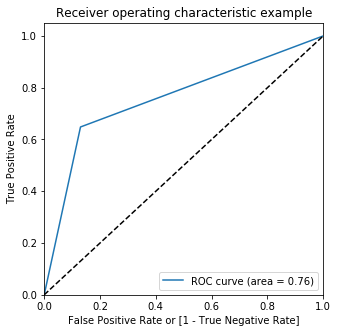

('------Accuracy------------ ', 0.78339517625231914)


Features        VIF
3                            TotalVisits_True        inf
4                   Page Views Per Visit_True        inf
44                      LastActivity_Modified  71.729729
40                  LastActivity_Email Opened  63.014421
48                      LastActivity_SMS Sent  48.331076
29                            HowHear_Unknown  21.054256
24                      HowHear_Online Search  10.749265
46       LastActivity_Page Visited on Website   8.081758
30                      HowHear_Word Of Mouth   5.543573
28              HowHear_Student of SomeSchool   5.156597
45       LastActivity_Olark Chat Conversation   4.897229
38            LastActivity_Email Link Clicked   4.889345
25                              HowHear_Other   3.486619
23                   HowHear_Multiple Sources   3.010591
1         Lead Origin_Landing Page Submission   2.566393
37                 LastActivity_Email Bounced   2.379203
36                               FreeCopy_Yes   2.278784
50                  LastActivity_Unsubscribed   1.970679
27                       HowHear_Social Media   1.922450
49                   LastActivity_Unreachable   1.666721
8           Specialization_Finance Management   1.532446
11   Specialization_Human Resource Management   1.458423
14        Specialization_Marketing Management   1.419105
2                     Lead Origin_Other Forms   1.392517
22                              HowHear_Email   1.389184
26                                HowHear_SMS   1.365316
16       Specialization_Operations Management   1.307167
43      LastActivity_Had a Phone Conversation   1.289399
5      Specialization_Business Administration   1.245282
12      Specialization_IT Projects Management   1.232717
20     Specialization_Supply Chain Management   1.222540
0                                 WebsiteTime   1.161698
21          Specialization_Travel and Tourism   1.144524
15       Specialization_Media and Advertising   1.134880
13      Specialization_International Business   1.123318
9        Specialization_Healthcare Management   1.114777
31                          City_Other Cities   1.108066
33                    City_Other Metro Cities   1.091238
10      Specialization_Hospitality Management   1.081529
7                   Specialization_E-COMMERCE   1.079770
34                     City_Thane & Outskirts   1.077897
17           Specialization_Retail Management   1.071732
18      Specialization_Rural and Agribusiness   1.070773
32           City_Other Cities of Maharashtra   1.062859
6                   Specialization_E-Business   1.047834
39             LastActivity_Email Marked Spam   1.039366
19         Specialization_Services Excellence   1.034810
47        LastActivity_Resubscribed to emails   1.034245
42     LastActivity_Form Submitted on Website   1.033047
35                        City_Tier II Cities   1.025994
41                LastActivity_Email Received        NaN
51  LastActivity_View in browser link Clicked        NaN

In [43]:
get_vif(X_train)

Lets drop the first value based on this

In [44]:
X_train.drop(['TotalVisits_True'],inplace=True,axis=1)
X_test.drop(['TotalVisits_True'],inplace=True,axis=1)

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6419
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2998.0
Date:                Mon, 07 Oct 2019   Deviance:                       5996.0
Time:                        22:16:16   Pearson chi2:                 6.64e+03
No. Iterations:                    20                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.3664   3617.132     -

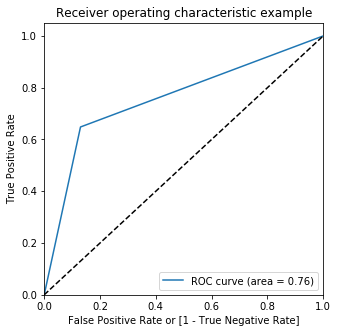

('------Accuracy------------ ', 0.78339517625231914)


Features        VIF
43                      LastActivity_Modified  71.729729
39                  LastActivity_Email Opened  63.014421
47                      LastActivity_SMS Sent  48.331076
28                            HowHear_Unknown  21.054256
23                      HowHear_Online Search  10.749265
45       LastActivity_Page Visited on Website   8.081758
29                      HowHear_Word Of Mouth   5.543573
27              HowHear_Student of SomeSchool   5.156597
44       LastActivity_Olark Chat Conversation   4.897229
37            LastActivity_Email Link Clicked   4.889345
24                              HowHear_Other   3.486619
22                   HowHear_Multiple Sources   3.010591
1         Lead Origin_Landing Page Submission   2.566393
36                 LastActivity_Email Bounced   2.379203
35                               FreeCopy_Yes   2.278784
49                  LastActivity_Unsubscribed   1.970679
26                       HowHear_Social Media   1.922450
48                   LastActivity_Unreachable   1.666721
7           Specialization_Finance Management   1.532446
10   Specialization_Human Resource Management   1.458423
13        Specialization_Marketing Management   1.419105
2                     Lead Origin_Other Forms   1.392517
21                              HowHear_Email   1.389184
25                                HowHear_SMS   1.365316
15       Specialization_Operations Management   1.307167
42      LastActivity_Had a Phone Conversation   1.289399
3                   Page Views Per Visit_True   1.275209
4      Specialization_Business Administration   1.245282
11      Specialization_IT Projects Management   1.232717
19     Specialization_Supply Chain Management   1.222540
0                                 WebsiteTime   1.161698
20          Specialization_Travel and Tourism   1.144524
14       Specialization_Media and Advertising   1.134880
12      Specialization_International Business   1.123318
8        Specialization_Healthcare Management   1.114777
30                          City_Other Cities   1.108066
32                    City_Other Metro Cities   1.091238
9       Specialization_Hospitality Management   1.081529
6                   Specialization_E-COMMERCE   1.079770
33                     City_Thane & Outskirts   1.077897
16           Specialization_Retail Management   1.071732
17      Specialization_Rural and Agribusiness   1.070773
31           City_Other Cities of Maharashtra   1.062859
5                   Specialization_E-Business   1.047834
38             LastActivity_Email Marked Spam   1.039366
18         Specialization_Services Excellence   1.034810
46        LastActivity_Resubscribed to emails   1.034245
41     LastActivity_Form Submitted on Website   1.033047
34                        City_Tier II Cities   1.025994
40                LastActivity_Email Received        NaN
50  LastActivity_View in browser link Clicked        NaN

In [45]:
get_vif(X_train)

Not a significant change

In [46]:
X_train.drop(['LastActivity_Modified'],inplace=True,axis=1)
X_test.drop(['LastActivity_Modified'],inplace=True,axis=1)

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6419
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2998.0
Date:                Mon, 07 Oct 2019   Deviance:                       5996.0
Time:                        22:16:22   Pearson chi2:                 6.64e+03
No. Iterations:                    20                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -4.1216      0.461     -

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


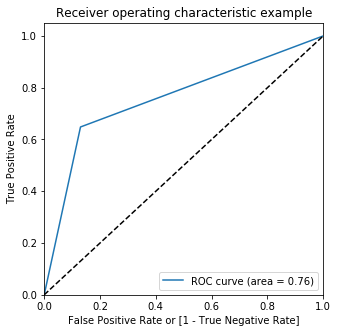

('------Accuracy------------ ', 0.78339517625231914)


Features        VIF
3                   Page Views Per Visit_True  48.278881
28                            HowHear_Unknown  35.063056
23                      HowHear_Online Search   6.466104
1         Lead Origin_Landing Page Submission   5.321267
29                      HowHear_Word Of Mouth   3.371446
35                               FreeCopy_Yes   3.243207
27              HowHear_Student of SomeSchool   3.170019
24                              HowHear_Other   2.255287
22                   HowHear_Multiple Sources   2.038709
0                                 WebsiteTime   2.011126
39                  LastActivity_Email Opened   1.910356
46                      LastActivity_SMS Sent   1.756017
7           Specialization_Finance Management   1.737105
10   Specialization_Human Resource Management   1.631874
13        Specialization_Marketing Management   1.590695
26                       HowHear_Social Media   1.444813
2                     Lead Origin_Other Forms   1.394671
15       Specialization_Operations Management   1.390719
4      Specialization_Business Administration   1.308647
11      Specialization_IT Projects Management   1.286769
19     Specialization_Supply Chain Management   1.278865
30                          City_Other Cities   1.218958
21                              HowHear_Email   1.199307
33                     City_Thane & Outskirts   1.187706
25                                HowHear_SMS   1.183542
20          Specialization_Travel and Tourism   1.173857
14       Specialization_Media and Advertising   1.161804
32                    City_Other Metro Cities   1.150039
12      Specialization_International Business   1.147390
8        Specialization_Healthcare Management   1.139213
31           City_Other Cities of Maharashtra   1.125109
44       LastActivity_Page Visited on Website   1.119258
9       Specialization_Hospitality Management   1.099282
6                   Specialization_E-COMMERCE   1.096006
16           Specialization_Retail Management   1.084905
17      Specialization_Rural and Agribusiness   1.080696
43       LastActivity_Olark Chat Conversation   1.072401
37            LastActivity_Email Link Clicked   1.061254
5                   Specialization_E-Business   1.055789
18         Specialization_Services Excellence   1.040318
34                        City_Tier II Cities   1.034718
36                 LastActivity_Email Bounced   1.026717
48                  LastActivity_Unsubscribed   1.023294
47                   LastActivity_Unreachable   1.015825
42      LastActivity_Had a Phone Conversation   1.009966
45        LastActivity_Resubscribed to emails   1.005807
38             LastActivity_Email Marked Spam   1.003788
41     LastActivity_Form Submitted on Website   1.003609
40                LastActivity_Email Received        NaN
49  LastActivity_View in browser link Clicked        NaN

In [47]:
get_vif(X_train)

Accuracy hasnt fallen, hence we can still go ahead and drop some more columns

In [48]:
X_train.drop(['Page Views Per Visit_True'],inplace=True,axis=1)
X_test.drop(['Page Views Per Visit_True'],inplace=True,axis=1)

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3010.4
Date:                Mon, 07 Oct 2019   Deviance:                       6020.8
Time:                        22:16:28   Pearson chi2:                 6.62e+03
No. Iterations:                    20                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.4742      0.334     -

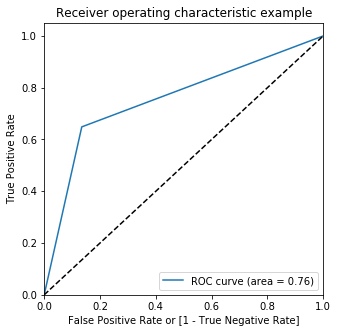

('------Accuracy------------ ', 0.78076685219542363)


Features       VIF
1         Lead Origin_Landing Page Submission  5.248099
27                            HowHear_Unknown  3.932877
34                               FreeCopy_Yes  3.205290
22                      HowHear_Online Search  2.037493
0                                 WebsiteTime  1.993337
38                  LastActivity_Email Opened  1.859069
6           Specialization_Finance Management  1.721692
45                      LastActivity_SMS Sent  1.689399
9    Specialization_Human Resource Management  1.614378
12        Specialization_Marketing Management  1.580094
26              HowHear_Student of SomeSchool  1.434490
28                      HowHear_Word Of Mouth  1.431798
14       Specialization_Operations Management  1.382654
3      Specialization_Business Administration  1.303586
10      Specialization_IT Projects Management  1.282928
18     Specialization_Supply Chain Management  1.274249
2                     Lead Origin_Other Forms  1.273000
23                              HowHear_Other  1.238347
29                          City_Other Cities  1.218888
21                   HowHear_Multiple Sources  1.213256
32                     City_Thane & Outskirts  1.187490
19          Specialization_Travel and Tourism  1.172422
13       Specialization_Media and Advertising  1.159008
31                    City_Other Metro Cities  1.149181
11      Specialization_International Business  1.146191
7        Specialization_Healthcare Management  1.136815
30           City_Other Cities of Maharashtra  1.125106
43       LastActivity_Page Visited on Website  1.114350
8       Specialization_Hospitality Management  1.098514
5                   Specialization_E-COMMERCE  1.094762
25                       HowHear_Social Media  1.088316
15           Specialization_Retail Management  1.083996
16      Specialization_Rural and Agribusiness  1.080126
42       LastActivity_Olark Chat Conversation  1.069559
36            LastActivity_Email Link Clicked  1.058280
4                   Specialization_E-Business  1.054846
20                              HowHear_Email  1.048431
17         Specialization_Services Excellence  1.040048
24                                HowHear_SMS  1.035554
33                        City_Tier II Cities  1.034695
35                 LastActivity_Email Bounced  1.026222
47                  LastActivity_Unsubscribed  1.022761
46                   LastActivity_Unreachable  1.015499
41      LastActivity_Had a Phone Conversation  1.009774
44        LastActivity_Resubscribed to emails  1.005788
40     LastActivity_Form Submitted on Website  1.003584
37             LastActivity_Email Marked Spam  1.003556
39                LastActivity_Email Received       NaN
48  LastActivity_View in browser link Clicked       NaN

In [49]:
get_vif(X_train)

Let us drop one last column and see how the accuracy changes

In [50]:
X_train.drop(['Lead Origin_Landing Page Submission'],inplace=True,axis=1)
X_test.drop(['Lead Origin_Landing Page Submission'],inplace=True,axis=1)

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Model Selection
Now that we have two potential models, we have to select the best one

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3022.3
Date:                Mon, 07 Oct 2019   Deviance:                       6044.6
Time:                        22:16:33   Pearson chi2:                 6.60e+03
No. Iterations:                    20                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.7535      0.329     -

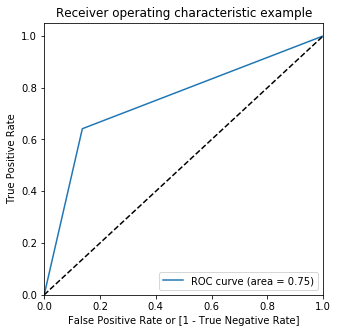

('------Accuracy------------ ', 0.77674706246134817)


Features       VIF
26                            HowHear_Unknown  3.929078
33                               FreeCopy_Yes  2.147897
0                                 WebsiteTime  1.956881
37                  LastActivity_Email Opened  1.854529
21                      HowHear_Online Search  1.813325
44                      LastActivity_SMS Sent  1.673854
5           Specialization_Finance Management  1.671980
8    Specialization_Human Resource Management  1.577626
11        Specialization_Marketing Management  1.543995
13       Specialization_Operations Management  1.361710
25              HowHear_Student of SomeSchool  1.352814
27                      HowHear_Word Of Mouth  1.344226
2      Specialization_Business Administration  1.281762
9       Specialization_IT Projects Management  1.255967
17     Specialization_Supply Chain Management  1.252381
1                     Lead Origin_Other Forms  1.237572
28                          City_Other Cities  1.218877
22                              HowHear_Other  1.193706
31                     City_Thane & Outskirts  1.186398
20                   HowHear_Multiple Sources  1.161578
18          Specialization_Travel and Tourism  1.158087
30                    City_Other Metro Cities  1.147420
12       Specialization_Media and Advertising  1.145177
10      Specialization_International Business  1.136011
6        Specialization_Healthcare Management  1.132053
29           City_Other Cities of Maharashtra  1.123150
42       LastActivity_Page Visited on Website  1.113657
7       Specialization_Hospitality Management  1.096651
4                   Specialization_E-COMMERCE  1.088276
14           Specialization_Retail Management  1.077507
15      Specialization_Rural and Agribusiness  1.075917
24                       HowHear_Social Media  1.068977
41       LastActivity_Olark Chat Conversation  1.064000
35            LastActivity_Email Link Clicked  1.058198
3                   Specialization_E-Business  1.049875
19                              HowHear_Email  1.040444
16         Specialization_Services Excellence  1.036648
32                        City_Tier II Cities  1.033824
23                                HowHear_SMS  1.025747
34                 LastActivity_Email Bounced  1.023484
46                  LastActivity_Unsubscribed  1.022753
45                   LastActivity_Unreachable  1.015496
40      LastActivity_Had a Phone Conversation  1.009693
43        LastActivity_Resubscribed to emails  1.005210
36             LastActivity_Email Marked Spam  1.003556
39     LastActivity_Form Submitted on Website  1.003412
38                LastActivity_Email Received       NaN
47  LastActivity_View in browser link Clicked       NaN

In [51]:
get_vif(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3550.5
Date:                Mon, 07 Oct 2019   Deviance:                       7101.0
Time:                        22:16:38   Pearson chi2:                 6.62e+03
No. Iterations:                    19                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6591      0.048    -13.654    

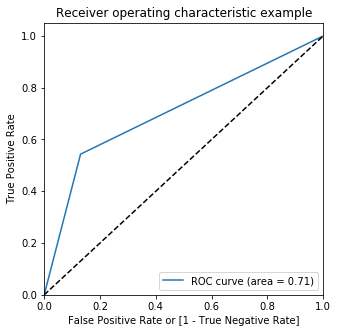

('------Accuracy------------ ', 0.74226963512677802)


Features       VIF
4                      City_Tier II Cities  1.009281
2                              HowHear_SMS  1.007109
3                     HowHear_Social Media  1.005601
1                            HowHear_Email  1.002671
11    LastActivity_Page Visited on Website  1.002669
6          LastActivity_Email Link Clicked  1.002267
14                LastActivity_Unreachable  1.002106
5               LastActivity_Email Bounced  1.001005
10    LastActivity_Olark Chat Conversation  1.000675
7   LastActivity_Form Submitted on Website  1.000000
8    LastActivity_Had a Phone Conversation  1.000000
12     LastActivity_Resubscribed to emails  1.000000
13                   LastActivity_SMS Sent  0.157630
0                  Lead Origin_Other Forms  0.067358
9                    LastActivity_Modified  0.032892

In [52]:
get_vif(final_model_train)

Now we have two models. One with a higher accuracy and more features and one with a lower accuracy and less features. Both contain features with VIF values less than 4 and hence minimal collinearity. Lets check the other metrics and arrive at a solution.

Till now we have been using the same threshold value. Lets see what the optimal threshold value is

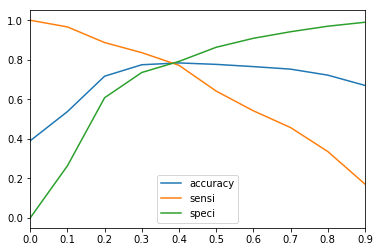

In [53]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
model_final_all = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
model_final_dropped = sm.GLM(y_train, (sm.add_constant(final_model_train)), family = sm.families.Binomial())
predicts_all = model_final_all .fit().predict(sm.add_constant(X_train))
predicts_dropped = model_final_dropped .fit().predict(sm.add_constant(final_model_train))
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]



# For the model with all columns
for i in num:
    cm1 = metrics.confusion_matrix(y_train, predicts_all.apply(lambda x: 1.0 if x>i else 0.0) )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1]*1.0)/total1
    
    speci = cm1[0,0]*1.0/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]*1.0/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df[cutoff_df.columns[1:]].plot()
plt.savefig('withall.png')

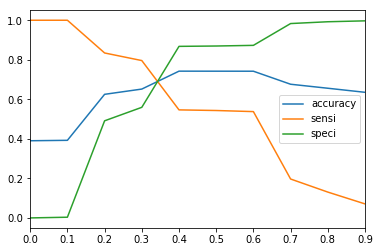

In [54]:

for i in num:
    cm1 = metrics.confusion_matrix(y_train, predicts_dropped.apply(lambda x: 1 if x>i else 0) )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1]*1.0)/total1
    
    speci = cm1[0,0]*1.0/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]*1.0/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df[cutoff_df.columns[1:]].plot()
plt.savefig('rfe.png')

From the above plots, its evident that the threshold must lie between 0.1 and 0.5

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3550.5
Date:                Mon, 07 Oct 2019   Deviance:                       7101.0
Time:                        22:16:44   Pearson chi2:                 6.62e+03
No. Iterations:                    19                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6591      0.048    -13.654    

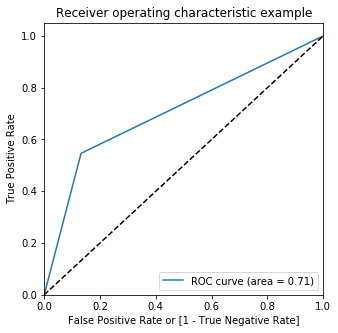

('------Accuracy------------ ', 0.74242424242424243)


Features       VIF
4                      City_Tier II Cities  1.009281
2                              HowHear_SMS  1.007109
3                     HowHear_Social Media  1.005601
1                            HowHear_Email  1.002671
11    LastActivity_Page Visited on Website  1.002669
6          LastActivity_Email Link Clicked  1.002267
14                LastActivity_Unreachable  1.002106
5               LastActivity_Email Bounced  1.001005
10    LastActivity_Olark Chat Conversation  1.000675
7   LastActivity_Form Submitted on Website  1.000000
8    LastActivity_Had a Phone Conversation  1.000000
12     LastActivity_Resubscribed to emails  1.000000
13                   LastActivity_SMS Sent  0.157630
0                  Lead Origin_Other Forms  0.067358
9                    LastActivity_Modified  0.032892

In [55]:
get_vif(final_model_train, 0.4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3022.3
Date:                Mon, 07 Oct 2019   Deviance:                       6044.6
Time:                        22:16:46   Pearson chi2:                 6.60e+03
No. Iterations:                    20                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.7535      0.329     -

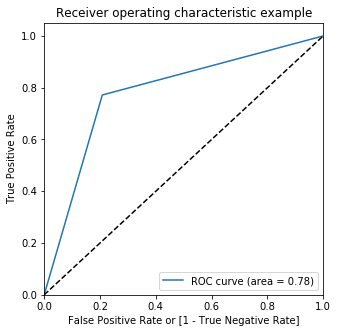

('------Accuracy------------ ', 0.78401360544217691)


Features       VIF
26                            HowHear_Unknown  3.929078
33                               FreeCopy_Yes  2.147897
0                                 WebsiteTime  1.956881
37                  LastActivity_Email Opened  1.854529
21                      HowHear_Online Search  1.813325
44                      LastActivity_SMS Sent  1.673854
5           Specialization_Finance Management  1.671980
8    Specialization_Human Resource Management  1.577626
11        Specialization_Marketing Management  1.543995
13       Specialization_Operations Management  1.361710
25              HowHear_Student of SomeSchool  1.352814
27                      HowHear_Word Of Mouth  1.344226
2      Specialization_Business Administration  1.281762
9       Specialization_IT Projects Management  1.255967
17     Specialization_Supply Chain Management  1.252381
1                     Lead Origin_Other Forms  1.237572
28                          City_Other Cities  1.218877
22                              HowHear_Other  1.193706
31                     City_Thane & Outskirts  1.186398
20                   HowHear_Multiple Sources  1.161578
18          Specialization_Travel and Tourism  1.158087
30                    City_Other Metro Cities  1.147420
12       Specialization_Media and Advertising  1.145177
10      Specialization_International Business  1.136011
6        Specialization_Healthcare Management  1.132053
29           City_Other Cities of Maharashtra  1.123150
42       LastActivity_Page Visited on Website  1.113657
7       Specialization_Hospitality Management  1.096651
4                   Specialization_E-COMMERCE  1.088276
14           Specialization_Retail Management  1.077507
15      Specialization_Rural and Agribusiness  1.075917
24                       HowHear_Social Media  1.068977
41       LastActivity_Olark Chat Conversation  1.064000
35            LastActivity_Email Link Clicked  1.058198
3                   Specialization_E-Business  1.049875
19                              HowHear_Email  1.040444
16         Specialization_Services Excellence  1.036648
32                        City_Tier II Cities  1.033824
23                                HowHear_SMS  1.025747
34                 LastActivity_Email Bounced  1.023484
46                  LastActivity_Unsubscribed  1.022753
45                   LastActivity_Unreachable  1.015496
40      LastActivity_Had a Phone Conversation  1.009693
43        LastActivity_Resubscribed to emails  1.005210
36             LastActivity_Email Marked Spam  1.003556
39     LastActivity_Form Submitted on Website  1.003412
38                LastActivity_Email Received       NaN
47  LastActivity_View in browser link Clicked       NaN

In [56]:
get_vif(X_train, 0.4)

Comparing both the models above, '0.4' is the optimal threshold and the model with the maximum features has beter metrics.

Let us generate the values for the test set as well and see which model behaves better

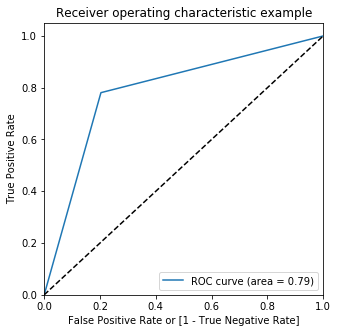

('------Accuracy------------ ', 0.79076479076479078)


In [57]:
model = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())

#Trying the First model and seeing its accuracy
predicts = model.fit().predict(sm.add_constant(X_test))
predicts['Classified'] = predicts.apply(lambda x: 1 if x>0.4 else 0)
draw_roc(y_test.values, predicts['Classified'])
from sklearn import metrics
# Create confusion matrix
confusion = metrics.confusion_matrix(y_test.values, predicts['Classified'])

# Calculate accuracy
print('------Accuracy------------ ',metrics.accuracy_score(y_test, predicts['Classified']))

The model performs well even on unseen data. Hence, this is the model we will pick. Let us now give a Lead Score to the records based on the predictions of the model

In [58]:

predicts_train = model.fit().predict(sm.add_constant(X_train))
# predicts_train['Classified'] = predicts.apply(lambda x: 1 if x>0.4 else 0)

predicts_test = model.fit().predict(sm.add_constant(X_test))
# predicts_test['Classified'] = predicts.apply(lambda x: 1 if x>0.4 else 0)

In [59]:
predicts_test

798     0.119011
2243    0.739757
1119    0.056687
3468    0.209430
2060    0.806199
8768    0.162966
4535    0.673018
1418    0.298984
3124    0.604861
4519    0.079777
6519    0.935783
4000    0.268985
3516    0.207130
5265    0.130286
2832    0.295061
1024    0.216147
7975    0.806095
7086    0.085581
5125    0.053748
4374    0.766012
4952    0.620392
1677    0.089436
766     0.153766
8145    0.429109
4936    0.255419
3096    0.085644
1637    0.876512
5007    0.925450
7771    0.069871
3520    0.757067
6632    0.643207
4335    0.778428
3566    0.879901
905     0.261477
2505    0.085581
2100    0.085581
5824    0.852644
2353    0.118975
4802    0.877980
5430    0.818727
8763    0.499340
4742    0.838612
4083    0.126186
2785    0.174207
5791    0.965763
19      0.100809
8330    0.326004
8576    0.615214
2064    0.324438
4624    0.471674
893     0.594797
7241    0.068898
8241    0.469276
4578    0.962677
7531    0.194750
6304    0.195012
9033    0.165550
954     0.709824
1129    0.9528

## Lead Score Classification
Now that we have our model, let us classify the records into their respect Lead Scores

In [60]:
Final_data_series = pd.concat([predicts_train,predicts_test],axis=0)
Final_data_frame = pd.DataFrame({"Lead Score":Final_data_series.values*100})
Final_data_frame['Lead Numbers'] = lead_nums
Final_data_frame['Prospect IDs'] = prospect_ids

In [61]:
Final_data_frame['Lead Score'] = Final_data_frame['Lead Score'].apply(lambda x: int(x))

In [62]:
Final_data_frame

Lead Score  Lead Numbers                          Prospect IDs
0             17        660737  7927b2df-8bba-4d29-b9a2-b6e0beafe620
1             17        660728  2a272436-5132-4136-86fa-dcc88c88f482
2              5        660727  8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3             59        660719  0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4             24        660681  3256f628-e534-4826-9d63-4a8b88782852
5             94        660680  2058ef08-2858-443e-a01f-a9237db2f5ce
6             23        660673  9fae7df4-169d-489b-afe4-0f3d752542ed
7              8        660664  20ef72a2-fb3b-45e0-924e-551c5fa59095
8             85        660624  cfa0128c-a0da-4656-9d47-0aa4e67bf690
9             12        660616  af465dfc-7204-4130-9e05-33231863c4b5
10             8        660608  2a369e35-ca95-4ca9-9e4f-9d27175aa320
11            19        660570  9bc8ce93-6144-49e0-9f9d-080fc980f83c
12            91        660562  8bf76a52-2478-476b-8618-1688e07874ad
13            10        660558  88867067-3750-4753-8d33-1c7d1db53b5e
14            93        660553  a8531c22-fcf1-48f8-a711-fb5abf98ad87
15            26        660547  25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f
16             9        660540  3abb7c77-1634-4083-9a9f-861068220611
17            19        660534  e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2
18            21        660522  82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c
19            64        660509  4512c16a-e96a-4459-b9ec-c7d8fe8c4880
20            54        660479  c4419c99-b002-408b-a6fd-fa100716592c
21            17        660478  fd71ab5b-53b8-4105-9960-efedc44962fa
22            23        660471  8fd38b83-5c32-4277-bcfb-499f34a01c56
23            16        660461  ecbc6e69-29a9-44bf-804a-13079ef301bc
24            52        660458  ecd117ca-375f-49ea-afd6-b52b84d00c69
25            17        660447  31c326f0-4a9b-43a6-9006-99d3830fbcae
26            96        660432  c494aca4-8c8e-4081-9784-41eb6346015e
27            17        660424  6d143c0e-abae-425f-a2c0-52c2946cbd45
28            39        660423  8247051c-f838-4a41-b39c-1f0b44c3d5e6
29            92        660410  b3455e2e-8236-478a-b1aa-666ad3381722
30            29        660402  da8c5ce5-52b5-4a4e-bf75-e533d2aca52c
31            22        660374  d2055a36-b268-43a0-beeb-9a715f6a660d
32            47        660361  c7d82991-3477-40ca-a616-db2d09228a55
33            18        660339  5af0914a-fa65-48e1-b11e-b44849206dc3
34            15        660333  bc19e116-132c-4e00-a3fa-caa1ddda2f4e
35            21        660321  30422ea1-36fe-465e-9e68-41ee190fefb3
36             8        660312  a8ecfc52-9988-498a-9a21-df747891b847
37             6        660267  e60a54bc-0816-430e-a99a-019a8b5a27e5
38            89        660255  e50b7515-b5a5-4691-a450-5e28ba99b472
39             8        660236  d6686032-c65e-4495-a0f4-ba7471209356
40            51        660235  daebea93-20bd-48be-b89b-85c7711ca0d7
41            15        660222  3ec75559-60f8-46f0-9198-bd3d05c464aa
42             9        660215  d262e52a-b8e1-4164-b869-bb199ddf75a9
43             6        660203  abc432ac-7393-4312-b49f-c43702397416
44            50        660194  85195b85-b384-4745-8e50-719566f70f52
45            16        660180  fd31b6df-f961-43ba-8e81-618ce5aabfe5
46            53        660174  18633077-5162-4cc6-8728-bc25f7a32fd1
47            96        660153  3f04fd93-2884-45f6-a4fc-f3b6f234554b
48            44        660149  86681269-67b1-4909-90c0-216136535815
49            14        660128  319325b3-50b3-45d0-b730-c9df0b30b9ea
50            39        660087  2def8175-7a88-405a-a932-669cacf60230
51            44        660070  1f13cede-ebf7-4e65-84ee-7d76e86a9094
52            11        660069  8597dacd-0b33-4b4f-ad9e-a9df020afd48
53            11        660050  833153b1-e44b-4260-a4cc-5ef310cc548c
54            57        660048  b9984279-2d76-41e0-a5f3-e14d6ff68f20
55            78        660030  165a8ed0-7155-4b32-bb21-b356c51e0412
56            68        659998  59e722da-edff-43d9-af61-f5c8bcc986c4
57  

Features used for the model:
1. Total Time Spent on Website
2. Lead Origin
3. Specialization 
4. How did you hear about X Education
5. City
6. A free copy of Mastering The Interview
7. Last Notable Activity